In [2]:
import pandas as pd
import numpy as np

In [23]:
# Read the csv file and convert to a data frame --> Data prep
csv_file = pd.read_csv("SalesbyHour.csv")
df = pd.DataFrame(csv_file)

In [40]:
df.head()


,Store_ID,Fiscal_Qtr,DateStringYYYYMMDD,Fiscal_dayofWk,Daypart,HourlyWeather,Hour,AvgHourlyTemp,SalesRevenue
0,2,3,20170714,5,Afternoon,rain,16,92.43,193.44
1,2,3,20170714,5,Afternoon,rain,14,89.56,323.84
2,2,3,20170714,5,Afternoon,rain,15,90.90,126.09
3,2,3,20170714,5,Breakfast,fog,8,77.35,154.54
4,2,3,20170714,5,Breakfast,partly-cloudy-day,9,79.06,89.60


In [41]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125792 entries, 0 to 125791
Data columns (total 9 columns):
Store_ID              125792 non-null category
Fiscal_Qtr            125792 non-null category
DateStringYYYYMMDD    125792 non-null int64
Fiscal_dayofWk        125792 non-null category
Daypart               125792 non-null category
HourlyWeather         125792 non-null category
Hour                  125792 non-null category
AvgHourlyTemp         125792 non-null float64
SalesRevenue          125792 non-null float64
dtypes: category(6), float64(2), int64(1)
memory usage: 3.6 MB
None


In [55]:
# Typecasting categorical variables
df['Daypart'] = df['Daypart'].astype('category')
df['HourlyWeather'] = df['HourlyWeather'].astype('category')
df['Hour'] = df['Hour'].astype('category')
df['Store_ID'] = df['Store_ID'].astype('category')
df['Fiscal_Qtr'] = df['Fiscal_Qtr'].astype('category')
df['DateStringYYYYMMDD'] = df['DateStringYYYYMMDD'].astype('category')
df['Fiscal_dayofWk'] = df['Fiscal_dayofWk'].astype('category')

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125792 entries, 0 to 125791
Data columns (total 9 columns):
Store_ID              125792 non-null category
Fiscal_Qtr            125792 non-null category
DateStringYYYYMMDD    125792 non-null category
Fiscal_dayofWk        125792 non-null category
Daypart               125792 non-null category
HourlyWeather         125792 non-null category
Hour                  125792 non-null category
AvgHourlyTemp         125792 non-null float64
SalesRevenue          125792 non-null float64
dtypes: category(7), float64(2)
memory usage: 2.9 MB


In [57]:
# Understanding the data
df.describe()

,AvgHourlyTemp,SalesRevenue
count,125792.000000,125792.000000
mean,68.548713,118.199876
std,15.336778,98.576510
min,5.850000,-822.620000
25%,57.900000,56.400000
50%,70.955000,97.680000
75%,80.840000,153.272500
max,100.620000,3818.510000


In [58]:
# Check for missing values in rows and columns
print(df.isnull().values.sum())
print(df.isnull().sum())

0
Store_ID              0
Fiscal_Qtr            0
DateStringYYYYMMDD    0
Fiscal_dayofWk        0
Daypart               0
HourlyWeather         0
Hour                  0
AvgHourlyTemp         0
SalesRevenue          0
dtype: int64


In [59]:
# Understanding our categorical variable
print("distinct categories for Dayparts is: ", df['Daypart'].value_counts().count())
print("distinct categories for HourlyWeather is: ", df['HourlyWeather'].value_counts().count())
print("number of stores: ", df['Store_ID'].value_counts())
df['Daypart'].value_counts()

distinct categories for Dayparts is:  5
distinct categories for HourlyWeather is:  9
number of stores:  17    18735
16    17519
2     15698
18    14976
11    14917
20    14108
21     7109
22     6193
31     5592
34     4320
36     3095
38     2710
23      502
32      318
Name: Store_ID, dtype: int64


Dinner        34549
Breakfast     32701
Lunch         28124
Afternoon     28094
Late Night     2324
Name: Daypart, dtype: int64

In [60]:
## Replace the categorical values with numbers
replace_map1 = {'Daypart': {'Breakfast': 1, 'Afternoon': 2, 'Lunch': 3, 'Late Night': 4,
                                  'Dinner': 5}}
replace_map2 = {'HourlyWeather': {'clear-day': 1, 'partly-cloudy-day': 2, 'rain': 3, 'clear-night': 4,
                                  'partly-cloudy-night': 5, 'cloudy':6, 'fog': 7, 'wind':8, 'snow':9}}


In [61]:
df2 = df.copy()

In [62]:
df2.replace(replace_map1, inplace=True)
df2.replace(replace_map2, inplace=True)

In [63]:
df2.head()

,Store_ID,Fiscal_Qtr,DateStringYYYYMMDD,Fiscal_dayofWk,Daypart,HourlyWeather,Hour,AvgHourlyTemp,SalesRevenue
0,2,3,20170714,5,2,3,16,92.43,193.44
1,2,3,20170714,5,2,3,14,89.56,323.84
2,2,3,20170714,5,2,3,15,90.90,126.09
3,2,3,20170714,5,1,7,8,77.35,154.54
4,2,3,20170714,5,1,2,9,79.06,89.60


In [64]:
df2['Daypart'] = df2['Daypart'].astype('category')
df2['HourlyWeather'] = df2['HourlyWeather'].astype('category')

In [65]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125792 entries, 0 to 125791
Data columns (total 9 columns):
Store_ID              125792 non-null category
Fiscal_Qtr            125792 non-null category
DateStringYYYYMMDD    125792 non-null category
Fiscal_dayofWk        125792 non-null category
Daypart               125792 non-null category
HourlyWeather         125792 non-null category
Hour                  125792 non-null category
AvgHourlyTemp         125792 non-null float64
SalesRevenue          125792 non-null float64
dtypes: category(7), float64(2)
memory usage: 2.9 MB


In [66]:
# Y-var
y_var = np.array(df2['SalesRevenue'])
# x-var, axis =1 just refers to the columns
x_var = df2.drop('SalesRevenue', axis=1)
# x-var column names
column_names = list(x_var.columns)
# need x-vars it in np array
x_var = np.array(x_var)

In [67]:
print(y_var[:5])
print(x_var[:5])
print(column_names)

[193.44 323.84 126.09 154.54  89.6 ]
[[2 3 20170714 5 2 3 16 92.43]
 [2 3 20170714 5 2 3 14 89.56]
 [2 3 20170714 5 2 3 15 90.9]
 [2 3 20170714 5 1 7 8 77.35]
 [2 3 20170714 5 1 2 9 79.06]]
['Store_ID', 'Fiscal_Qtr', 'DateStringYYYYMMDD', 'Fiscal_dayofWk', 'Daypart', 'HourlyWeather', 'Hour', 'AvgHourlyTemp']


In [68]:
# Training and test data
import scipy
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_var, y_var, test_size = 0.3, random_state = 42)

In [69]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(88054, 8)
(37738, 8)
(88054,)
(37738,)


In [70]:
# Get a 

In [71]:
# Now training the model
from sklearn.ensemble import RandomForestRegressor
# Start off with 50 trees, random_state = seed # --> want same situation
rf = RandomForestRegressor(n_estimators = 50, random_state = 42)
# Training model -- yaaay!
rf.fit(x_train, y_train)

/Users/kunlelawal/miniconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [72]:
# Checking model accuracy on test data
print(rf.score(x_train, y_train))
print(rf.score(x_test, y_test))

0.9395502596195551
0.6132090858077978


In [73]:
# Check variable importance
importances = list(rf.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(column_names, importances)]

feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Hour                 Importance: 0.28
Variable: DateStringYYYYMMDD   Importance: 0.2
Variable: Store_ID             Importance: 0.18
Variable: AvgHourlyTemp        Importance: 0.18
Variable: Fiscal_dayofWk       Importance: 0.08
Variable: Daypart              Importance: 0.03
Variable: HourlyWeather        Importance: 0.03
Variable: Fiscal_Qtr           Importance: 0.02


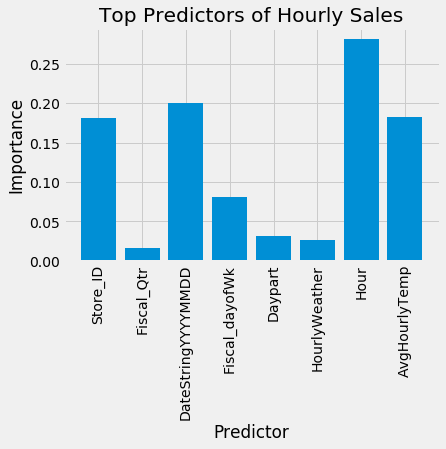

In [74]:
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, column_names, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Predictor'); plt.title('Top Predictors of Hourly Sales');

In [75]:
x_test[0]

array([17, 4, 20151224, 4, 2, 2, 15, 68.78], dtype=object)

In [76]:
# Getting data to predict for
data = pd.read_csv("predictionData.csv")
data = np.array(data)


In [79]:
# Test how good model is
predictions = rf.predict(data)
predictions_xVar = rf.predict(x_test)



In [80]:
np.mean(predictions)
print("""The total sales for all 14 stores on 2017-07-15 during hour 12, 
assuming a clear day and average temperature of 86 degrees is: """, np.round(np.sum(predictions),2))

The total sales for all 14 stores on 2017-07-15 during hour 12, 
assuming a clear day and average temperature of 86 degrees is:  3744.49
